In [76]:
import numpy as np
import matplotlib.pyplot as plt

#**Formula de Timoshenko**

La formula de Timoshenko determina el radio de curvatura de una lamina bimetálica.

$$R=\frac{x[3(1+m)^2+(1+mn)(m^2+\frac{1}{mn})]}{6\Delta T(\alpha_2 - \alpha_1)(1+m^2)} \tag{1}$$

$$x = x_1+x_2\hspace{1cm} m=\frac{x_1}{x_2}\hspace{1cm} n=\frac{\gamma_1}{\gamma_2}$$

En la ecuación $x_1$ y $x_2$ son el espesor de los metales $1$ y $2$, los valores $\alpha$ son los coeficientes lineales de los metales, y los valores $\gamma$ son los modulos de elasticidades de Young.

Facilmente notamos que es posible configurar 6 uniones únicas de los metales disponibles para construir las laminas.

Con el fin de obtener una buena interpretación del resultado al aplicar esta ecuación ($R>0$), nos restringiremos a las configuraciones de metales tales que $\alpha_2>\alpha_1$.



#**Intención del Trabajo**

Pensando en que según las investigaciones, se ha establecido un limite de incremento en la temperatura global de $1.5°C$, entonces podemos pensar en una alarma de activación por contacto que nos informe cuando hayamos cruzado del incremento en $1°C$ utilizando el principio de curvatura de láminas bimetálicas

El proposito de este trabajo es optimizar el Radio de curvatura. Para las dimensiones de una lámina bimetálica del tamaño de un termostato (del orden de $10^{-2}m$), un Radio de curvatura muy grande produce una curvatura minima de la lámina mientras que un Radio pequeño produce una curvatura mayor. Note que si $\Delta T \to 0$ entonces $R\to \infty$ y no se observa curvatura de la lámina.

La intención es entonces obtener un radio de curvatura pequeño que logre una curvatura notable y efectiva en la lámina.

Fijemos que una curvatura notable, pensada desde cómo se curva una regla elastica, es aquella que produce una sección de $1/8$ de circunferencia o $\pi/4 \hspace{2mm} rad$. Como la longitud de la lámina será del orden de $10^{-2}m$ entonces el Radio de curvatura deseado será también del orden de $10^{-2}m$

#**Análisis de la Ecuación y Resultados**

A partir de las cantidades presentes es en la ecuación, analizaremos qué valores u ordenes deberían tomar para lograr el objetivo de minimizar el Radio de curvatura al orden de $10^{-2}m$.

Este análisis es númerico del orden de potencias de 10 que toma la ecuación y sus valores, y su desarrollo se explica someramente. Si se desea mayor profundidad y conocimiento del análisis, consultar al estudiante.

Coeficientes $\alpha$: Para los metales que tenemos, sus coeficientes $\alpha$ son del orden de $10^{-6}$ por lo que producen un aumento en el Radio del orden de $10^6$. Como son valores fijos, no podemos manipularlos y debemos reducir el orden desde las demás variables.

Modulos de Young: Cuando observamos los posibles cocientes de las uniones de metales escogidos, nos damos cuenta que llegan a ser del orden $10^{-1}$. Esto nos deja un orden global en la ecuación de $10^5$

Temperatura: Por instrucción, trabajaremos con pequeñas variaciones de la temperatura. Pensando en la alarma que planteamos en la intención del trabajo, esta se activará cuando $\Delta T = 1°K$

**Valor de $m$:** Nos restringiremos al caso $m=1$ pues en él, la ecuación toma una forma mucho más simple.

$$m = 1\to x_1=x_2=x$$

$$R = \frac{x(12+(1+n)(1+\frac{1}{n}))} {12(\alpha_2 - \alpha_1)} \tag{2}$$

Considerando el orden global que se tenía de $10^5$, con esta expresión el orden regresa a ser de $10^6$. Si desde un principio planteamos que se desea llegar a un valor de Radio del orden de $10^{-2}m$, entonces concluimos que los valores de $x_1 \wedge x_2$ se encuentran entre el rango de [$10^{-7}m, 10^{-8}m$] o en el orden de los $nm$ nanometros.


In [77]:
def radius(x1, x2, a1, a2, y1, y2, dT):
  x = x1 + x2
  m = x1/x2
  n = y1/y2
  R = x*(3*((1 + m)**2) + ((1 + m*n)*(m**2 + 1/(m*n))))/(6*dT*((1 + m)**2)*(a2 - a1))
  return R

In [86]:
#Las posiciones de cada arreglo son respectivas a los demás. El arreglo 2 corresponde a los valores de alpha y el arreglo 3 a los módulos de Young.
metales = np.array([["Aluminio", "Laton", "Cobre", "FeNi36"], [24e-6, 18e-6, 17e-6, 2e-6], [70, 90, 110, 145]])
R = [["Al - La", "Al - Cu","Al - FeNi36", "La - Cu", "La - FeNi36", "Cu - FeNi36"], []]
dT = 1
x1 = np.array([1e-6,1e-7,1e-9,1e-9,1e-10])
x2 = np.array([1e-6,1e-7,1e-9,1e-9,1e-10])

In [87]:
for i in range(3):
  a2 = np.float64(metales[1][i])
  y2 = np.float64(metales[2][i])
  for j in range(i+1,4):
    a1 = np.float64(metales[1][j])
    y1 = np.float64(metales[2][j])
    R[1].append(radius(x1, x2, a1, a2, y1, y2, dT))

Text(0.5, 1.0, 'Rango de espesor $x$ para alcanzar $R \\approx 10^{-2}m$')

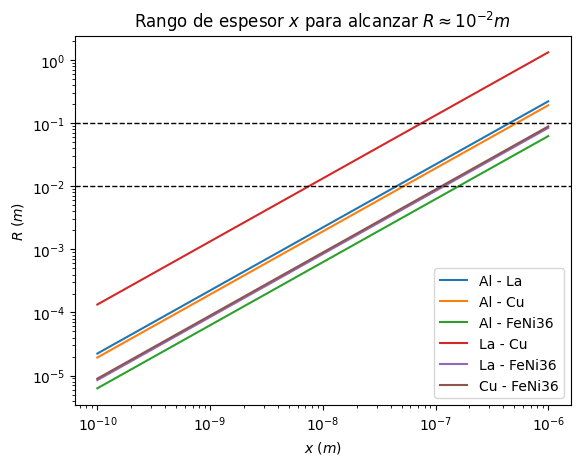

In [92]:
for i in range(6):
  plt.plot(x2, R[1][i], label = R[0][i])
plt.xscale("log")
plt.yscale("log")
plt.axhline(1e-1, linewidth = 1, linestyle = "dashed", color = "black")
plt.axhline(1e-2, linewidth = 1, linestyle = "dashed", color = "black")
plt.legend()
plt.xlabel("$x$ ($m$)")
plt.ylabel("$R$ ($m$)")
plt.title("Rango de espesor $x$ para alcanzar $R \\approx 10^{-2}m$")

Si deseamos conseguir un Radio de curvatura por el orden de $10^{-2}m$ a temperatura variable, nos preguntamos entonces cuál sería el orden de los espesores siempre y cuando $x_1=x_2$ (caso $m=1$)

Despejando $x$ de $(2)$ llegamos a la siguiente expresión.

$$x=\frac{12R(\alpha_2 - \alpha_1)\Delta T}{12+(a+n)(1+\frac{1}{n})}$$

Con el mismo análisis de ordenes, llegamos a la conclusión de que si variasemos $\Delta T$ en esta expresión para $\Delta T >>1$ los espesores de los metales aumentarían a más ordenes; si se variase para $\Delta T << 1$ entonces los espesores disminuyen a ordenes inferiores.

In [82]:
R = [["Al - La", "Al - Cu","Al - FeNi36", "La - Cu", "La - FeNi36", "Cu - FeNi36"], 1e-2]
dT = np.array([1e-2,1e-1,1,1e1,1e2])
x = []

In [83]:
def espesores(R, a1, a2, y1, y2, dt):
  n = y1/y2
  x = 12*R*(a2 - a1)*dt/(12 + (1+n)*(1 + 1/n))
  return x

In [84]:
for i in range(3):
  a2 = np.float64(metales[1][i])
  y2 = np.float64(metales[2][i])
  for j in range(i+1,4):
    a1 = np.float64(metales[1][j])
    y1 = np.float64(metales[2][j])
    x.append(espesores(R[1], a1, a2, y1, y2, dT))

Text(0.5, 1.0, 'Espesor de laminas (x) en función de $\\Delta T$ para alcanzar \n$R \\approx 10^{-2}m$')

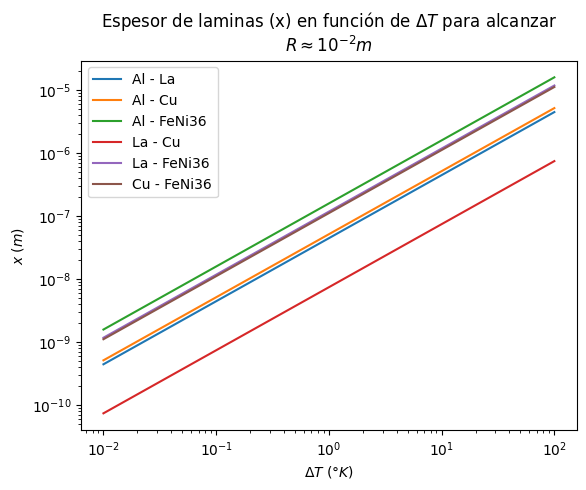

In [85]:
for i in range(6):
  plt.plot(dT, x[i], label = R[0][i])
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.ylabel("$x$ ($m$)")
plt.xlabel("$\Delta T$ (°$K$)")
plt.title("Espesor de laminas (x) en función de $\Delta T$ para alcanzar \n$R \\approx 10^{-2}m$")

#**Conclusiones**

El proposito que nos planteamos de lograr un Radio de curvatura del orden de $10^{-2}m$ se ha logrado en los siguientes aspectos.

**1.** Hemos encontrado un rango de espesores para todas las combinaciones de metales en las laminas. Cuando se plantea $\Delta T =1°K$ se encuentra el rango de espesores en [$10^{-8}m, 10^{-9}m$]

**2.** La combinación *Latón - Cobre* resulta ser aquella que requiere un espesor muy bajo ($\approx 10^{-8}m$) para satisfacer que se curve de forma notable como lo definimos en un inicio. Todas las demás combinaciones de metales son optimas pues logran la curvatura deseada en espesores del orden $10^{-7}m$, sin embargo, se podría decir que la mejor combinación es *Aluminio - FeNi36* (*Grafico 1*).

**3.** Cuando planteamos variar los ordenes de $\Delta T$ en un amplio rango ($10^{-2}°K - 10^{2}°K ) para conseguir el radio de curvatura deseado encontramos relación lineal entre los cambios de temperatura y el espesor de los metales.

Para pequeñas variaciones de temperatura ($10^{-1}°K - 10^{1}°K $) se encuentra rango de espesores bastente amplio desde $10^{-10}°m$ y  $10^{-7}m$. Si se quisiera emplear metales de espesor mayor a las micras se requieren altas temperaturas mayores a los 100 grados. Nuevamente encontramos que la combinación *Laton - Cobre* es la que requiere menor espesor para responder a los cambios de temperatura, mientras que la combinación *Aluminio - FeNi36* no requiere espesores tan bajos como los demás para responder al cambio de temperatura.

**4.** Habiendo analizado el caso sencillo $m=1$ que correspondía a espesores iguales de las laminas se lograron los anteriores resultados. Se debería explorar más las variaciones en espesor cuando $m\neq 1$ en cada una de las láminas y analizar su respuesta a cambios de temperatura de amplio rango.